## MotionSense Dataset Smartphone Sensor Data

# 스마트폰 센서 데이터에 기반한 행동 분석 knn모델 형성 및 성능향상 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

print('fin')
path = "MotionSense Dataset Smartphone Sensor Data/A_DeviceMotion_data/"

fin


data_sub_info는 조사자의 정보가 들어있는 csv파일로 보이며
motionsense dataset smartphone sensor폴더에는 걷거나 조깅 등의 활동에 대한 데이터가 각 조사자들에 대해 csv파일 형식으로 입력되어 있는 것으로 보임.

In [2]:
sub_df = pd.read_csv('MotionSense Dataset Smartphone Sensor Data/data_subjects_info.csv')
print(sub_df)

    code  weight  height  age  gender
0      1     102     188   46       1
1      2      72     180   28       1
2      3      48     161   28       0
3      4      90     176   31       1
4      5      48     164   23       0
5      6      76     180   28       1
6      7      62     175   30       0
7      8      52     161   24       0
8      9      93     190   32       1
9     10      72     164   31       0
10    11      70     178   24       1
11    12      60     167   33       1
12    13      60     178   33       1
13    14      70     180   35       1
14    15      70     185   33       1
15    16      96     172   29       0
16    17      76     180   26       1
17    18      54     164   26       0
18    19      78     164   28       0
19    20      88     180   25       1
20    21      52     165   24       1
21    22     100     186   31       1
22    23      68     170   25       0
23    24      74     173   18       0


In [3]:
# Setting up lists for importing the data.
list_of_folders = os.listdir(path)
list_of_directories = [path + i for i in list_of_folders]
data = pd.DataFrame(columns=['gravity.x','gravity.y','gravity.z','rotationRate.x','rotationRate.y','rotationRate.z'])
# list_of_folders
for i in list_of_directories:
    if 'dws' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'dws'
            sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data, sub_df]
            data = pd.concat(dfs)
    elif 'jog' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'jog'
            sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data, sub_df]
            data = pd.concat(dfs)
    elif 'sit' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'sit'
            sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data, sub_df]
            data = pd.concat(dfs)
    elif 'std' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'std'
            sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data, sub_df]
            data = pd.concat(dfs)
    elif 'ups' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'ups'
            sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data, sub_df]
            data = pd.concat(dfs)
    elif 'wlk' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'wlk'
            sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data, sub_df]
            data = pd.concat(dfs)
data = data.rename(columns={'gravity.x': 'gx', 'gravity.y': 'gy', 'gravity.z': 'gz','rotationRate.x' : 'rx', 'rotationRate.y' : 'ry', 'rotationRate.z' : 'rz'})
data = data.reset_index()
data = data.drop('index',axis=1)
data

# Iterating through the directories and appending the dataframes for each subject in each of the trials to a list for further use.

C:\Temp\ipykernel_4380\3099472470.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(dfs)


,gx,gy,gz,rx,ry,rz,action
0,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,dws
1,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,dws
2,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,dws
3,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,dws
4,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,dws
...,...,...,...,...,...,...,...
1412860,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,wlk
1412861,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,wlk
1412862,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,wlk
1412863,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,wlk


data는 먼저 gravity와 rotation을 통해 예시로 만들어 본 데이터셋이다.

test data와 training data를 나누어 학습에 사용하였다

In [4]:
# from sklearn.model_selection import train_test_split

x = data.drop('action', axis=1)
y = data['action']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1,random_state=42)

가장 먼저 기본적인 알고리즘인 knn알고리즘을 사용하여 보았다.

              precision    recall  f1-score   support

         dws       0.41      0.52      0.46     13026
         jog       0.57      0.54      0.55     13373
         sit       1.00      1.00      1.00     33651
         std       0.96      0.98      0.97     30649
         ups       0.58      0.44      0.50     16023
         wlk       0.69      0.70      0.70     34565

    accuracy                           0.77    141287
   macro avg       0.70      0.70      0.70    141287
weighted avg       0.77      0.77      0.77    141287

score :  0.7709484949075286
[[ 6727  1292     9   326  1302  3370]
 [ 2205  7172     9    53   927  3007]
 [    9    10 33600     2    12    18]
 [  254    28     1 30122    97   147]
 [ 2812  1523    34   348  7104  4202]
 [ 4509  2665    47   431  2713 24200]]


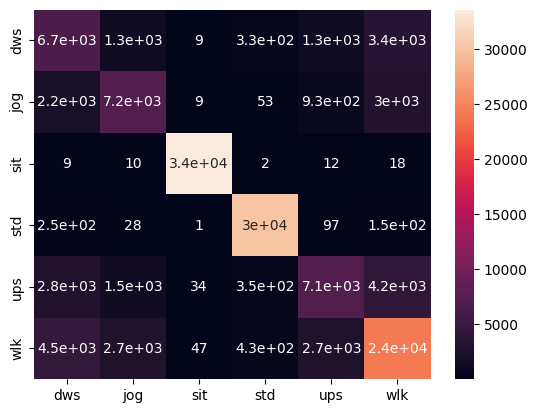

In [5]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain,ytrain)
y_pred = knn_model.predict(xtest)
score = knn_model.score(xtest,ytest)

print(classification_report(ytest,y_pred))
print('score : ',score)
cm = confusion_matrix(ytest,y_pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)
# rr = []
# for row in cm:
#     rs = sum(row)
#     rr.append(rs)
# print(rr)
#report에 나오는 순서대로 heatmap의 label임

대략 정확도 77%를 기록한 것을 볼 수 있다. 학습시킨 데이터의 양에 비해 정확도가 부족한 것으로 보인다.
다만 일어서는 경우와 앉는 경우는 확실하게 구분됨을 볼 수 있다. 
반면 마찬가지로 반대인 경우라고 생각되는 dws와 ups는 구부누이 잘 안된 모습을 보인다.
걷는 경우는 잘 알아차렸지만 또한 뛰는 경우는 잘 분류하지 못했다. 
heatmap을 보면 jog를 wlk라고 판단한 경우의 수가 상당히 많음을 볼 수 있다.
k값에 따라 정확도가 달라질 수 있음으로 k를 값에 대한 정확도를 보자.

best score : 0.7934417179216772


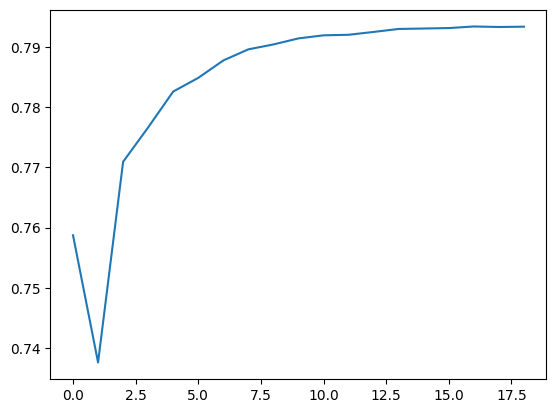

In [6]:
best_score = -1
s_list = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    sco = knn.score(xtest,ytest)
    s_list.append(sco)
    if sco > best_score:
        best_score = sco
print('best score :', best_score)
plt.plot(s_list)

k가 커질수록 더 나은 성능을 보여준다 이때 k가 늘어날수록 계산량이 많아짐으로 나중에 성능 향상에 있어 적당한 k값을 사용하도록 한다.

정확도 향상을 위해 knn말고 다른 알고리즘인 Decision TreeClassifier를 사용해보도록 한다. 
Decision TreeClassifier는 데이터의 규칙을 학습을 통해 트리 기반의 분류 규칙을 만드는 알고리즘이다.
knn에서 k로 주변의 몇개의 데이터를 통해 추론할지 정하는 모델이였던것 처럼 decisionTreeClassifier는 분기가 몇개가 될것인지를 정한다.

In [7]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
d_model = DecisionTreeClassifier() # 일단 깊이는 무제한
d_model.fit(xtrain, ytrain)
score = d_model.score(xtest,ytest)
print("score : ",score)

score :  0.7601973288412947


best score : 0.7834054088486556


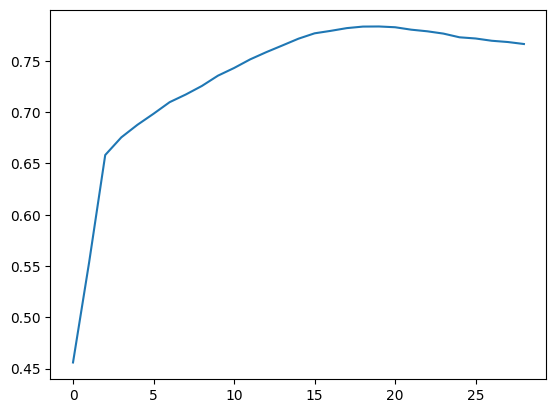

In [8]:
best_score = -1
s_list = []
for i in range(1,30):
    d_model = DecisionTreeClassifier(max_depth=i) # 일단 깊이는 무제한
    d_model.fit(xtrain, ytrain)
    sco = d_model.score(xtest,ytest)
    s_list.append(sco)
    if sco > best_score:
        best_score = sco
print('best score :', best_score)
plt.plot(s_list)

분기가 20개 정도가 될때 까지 계속 상승했다가 이후에는 약간은 하강한 모습이다. decision tree는 knn보다 대략 3%정도의 높은 정확도를 보여준다. 시간이 오래 걸리는 것에 비해 높은 수치라고 할 수는 없다.
decision tree는 시각화가 쉽지만 현재 데이터상에서 매우 높은 분기에서 높은 정확도를 보여줌으로 시각화할시 매우 복잡한 그림이 나와 알아보기가 힘들 것이다.

트리의 특성 중요도는 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 것.
해당 feature들만 가지고 다 분류가 가능한것은 아님. 단지 어떤 feaure가 많이 기여하는가를 나타냄. 

[0.07292473 0.3226341  0.09790685 0.32564432 0.0799416  0.10094839]


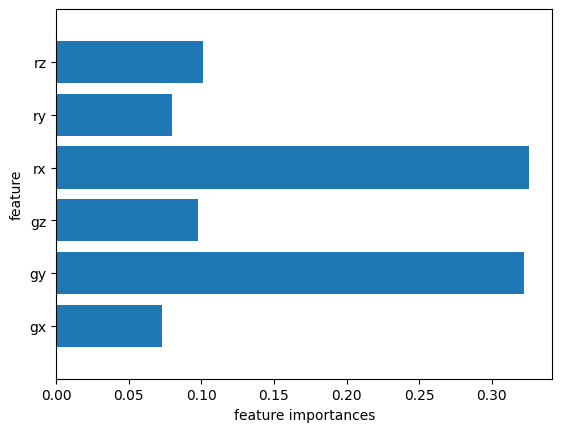

In [9]:
d_model = DecisionTreeClassifier(max_depth=20) # 일단 깊이는 무제한
d_model.fit(xtrain, ytrain)
print(d_model.feature_importances_)

def plot_feature_importances_cancer(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(d_model)

현재 데이터셋에 대해서 rx, gy가 가장 많은 기여를 한 것을 볼 수 있다.
decision트리를 사용하여 성능 향상을 시도해볼 경우 rx와 gy데이터를 cleansing 하여 볼 수 있을 것이다.

먼저 knn의 성능 향상을 시도해 보았다.
모든 데이터가 들어가있는 데이터셋인 data2를 만든 뒤 이를 여러 갈개로 나누어 어떤 데이터셋을 사용했을 때 행동 분류의 정확도가 가장 높을지 확인

In [10]:
# Setting up lists for importing the data.

list_of_folders = os.listdir(path)
list_of_directories = [path + i for i in list_of_folders]

data2 = pd.DataFrame()
# list_of_folders

for i in list_of_directories:
    if 'dws' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'dws'
            # sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data2, sub_df]
            data2 = pd.concat(dfs)
    elif 'jog' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'jog'
            # sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data2, sub_df]
            data2 = pd.concat(dfs)
    elif 'sit' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'sit'
            # sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data2, sub_df]
            data2 = pd.concat(dfs)
    elif 'std' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'std'
            # sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data2, sub_df]
            data2 = pd.concat(dfs)
    elif 'ups' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'ups'
            # sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data2, sub_df]
            data2 = pd.concat(dfs)
    elif 'wlk' in i:
        sublist = os.listdir(i)
        sublist_dir = [i +'/'+k for k in sublist]
        for j in sublist_dir:
            sub_df = pd.read_csv(j)
            sub_df['action'] = 'wlk'
            # sub_df.drop(['attitude.pitch','attitude.roll','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z','Unnamed: 0'],axis=1,inplace=True)
            dfs = [data2, sub_df]
            data2 = pd.concat(dfs)

# data = data.rename(columns={'gravity.x': 'gx', 'gravity.y': 'gy', 'gravity.z': 'gz','rotationRate.x' : 'rx', 'rotationRate.y' : 'ry', 'rotationRate.z' : 'rz'})
data2 = data2.reset_index()
data2 = data2.drop(['index','Unnamed: 0'],axis=1)

atti = data2[['attitude.roll','attitude.pitch','attitude.yaw']]
grav = data2[['gravity.x','gravity.y','gravity.z']]
rot = data2[['rotationRate.x','rotationRate.y','rotationRate.z']]
user = data2[['userAcceleration.x','userAcceleration.y','userAcceleration.z']]

xx = data2.drop('action', axis=1)
yy = data2['action']
# xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1,random_state=42)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xx,yy,test_size=0.1,random_state=42)
data2


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,action
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,0.890518,-1.300928,0.089878,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,0.044079,-0.204574,0.204906,wlk
1412861,0.929499,-1.319499,0.124063,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,0.066348,-0.222604,0.225136,wlk
1412862,0.966103,-1.340284,0.159858,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,-0.005959,-0.054040,0.240632,wlk
1412863,1.005158,-1.362495,0.201540,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,-0.007767,-0.003927,0.194735,wlk


어떤 데이터끼리의 조합이 가장 효과적일까?
아래와 같이 4개(attitude gravity rotation userAcceleration)의 데이터를 각각 나누어 사용하였다.
데이터셋의 수가 많아지면 연산하는데 cost가 더 많이 들 것으로 예상된다.

In [11]:
comb11 = atti
comb12 = grav
comb13 = rot
comb14 = user

comb21 = pd.concat([atti,grav],axis=1)
comb22 = pd.concat([atti,rot],axis=1)
comb23 = pd.concat([atti,user],axis=1)
comb24 = pd.concat([grav,rot],axis=1)
comb25 = pd.concat([grav,user],axis=1)
comb26 = pd.concat([rot,user],axis=1)

comb31 = pd.concat([atti,grav,rot],axis=1)
comb32 = pd.concat([atti,grav,user],axis=1)
comb33 = pd.concat([atti,rot,user],axis=1)
comb34 = pd.concat([grav,rot,user],axis=1)

comb41 = pd.concat([atti, grav, rot, user],axis=1)

ll = [comb11, comb12, comb13, comb14, comb21, comb22, comb23, comb24, comb25, comb26, comb31, comb32, comb33, comb34, comb41]

데이터셋에 대한 knn 성능평가

In [12]:
#데이터셋에 따른 성능평가
s_list = []
for df in ll:
    x = df
    y = data2['action']
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1,random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(xtrain,ytrain)
    sco = knn.score(xtest,ytest)
    s_list.append(sco)

print(s_list)
print(max(s_list))

[0.7647271157289772, 0.6072391656698777, 0.5475096788805764, 0.6264553709824683, 0.7671335650130585, 0.8645876832263407, 0.8797837026761132, 0.7826268517273351, 0.7995852413880966, 0.7720455526693892, 0.8741851691946181, 0.8854884030377883, 0.9270845866923355, 0.8890485324198263, 0.9320815078528102]
0.9320815078528102


4개의 데이터를 모두 활용하여 knn한것이 가장 좋은 accuracy를 보임

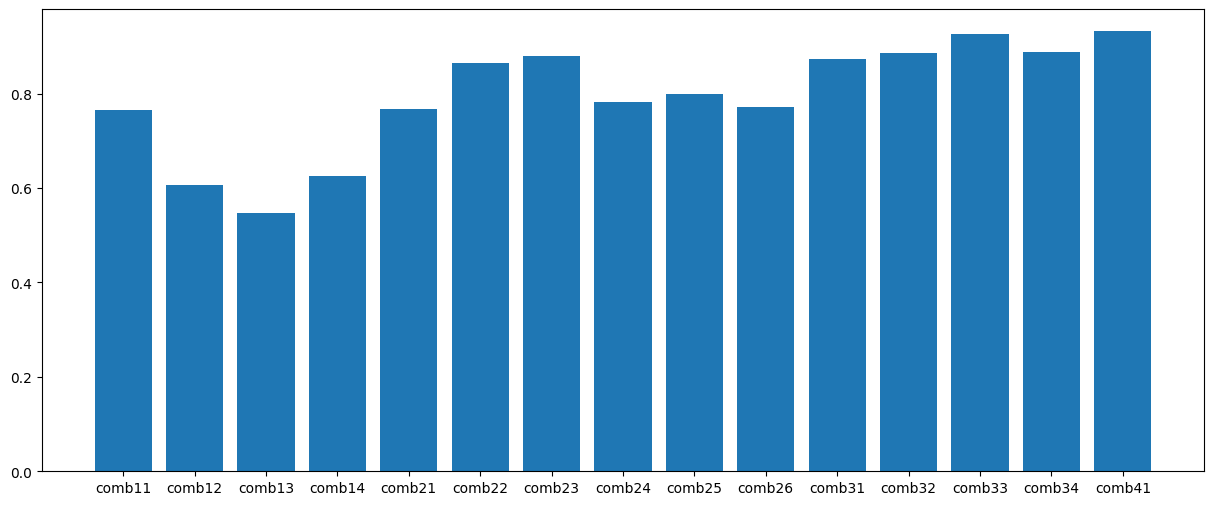

In [13]:
ll_label = ['comb11', 'comb12', 'comb13', 'comb14', 'comb21', 'comb22', 'comb23', 'comb24', 'comb25', 'comb26', 'comb31', 'comb32', 'comb33', 'comb34', 'comb41']
plt.figure(figsize=(15, 6))
bars = plt.bar(ll_label, s_list)
plt.show()

데이터 종류를 하나만 사용하였을 때는 rot만 사용하였을 때 가장 낮은 정확도를 보였다.
2개를 합쳐서 사용하였을 때는 rotation과 user를 사용하였을 때 상대적으로 가장 낮은 정확도를 보였다.
3개를 합친 모든 경우는 대부분 양호한 정확도를 보였으며 가장 높은 정확도를 보인 knn 그룹은 전체 데이터를 통한 knn이였다.

decision tree도 다른 조합을 사용해보면 다른 결과가 발생할 수 있지 않을까?

[0.7546271065278476, 0.6355007891738094, 0.5900684422487561, 0.65831959062051, 0.7495027851111568, 0.8150643725183492, 0.8127357789463999, 0.7817208943497986, 0.7851465456836085, 0.7385392852845626, 0.8160552634000298, 0.8112989871679631, 0.8449184992249817, 0.8361491149221089, 0.8434250851104489]
0.8449184992249817


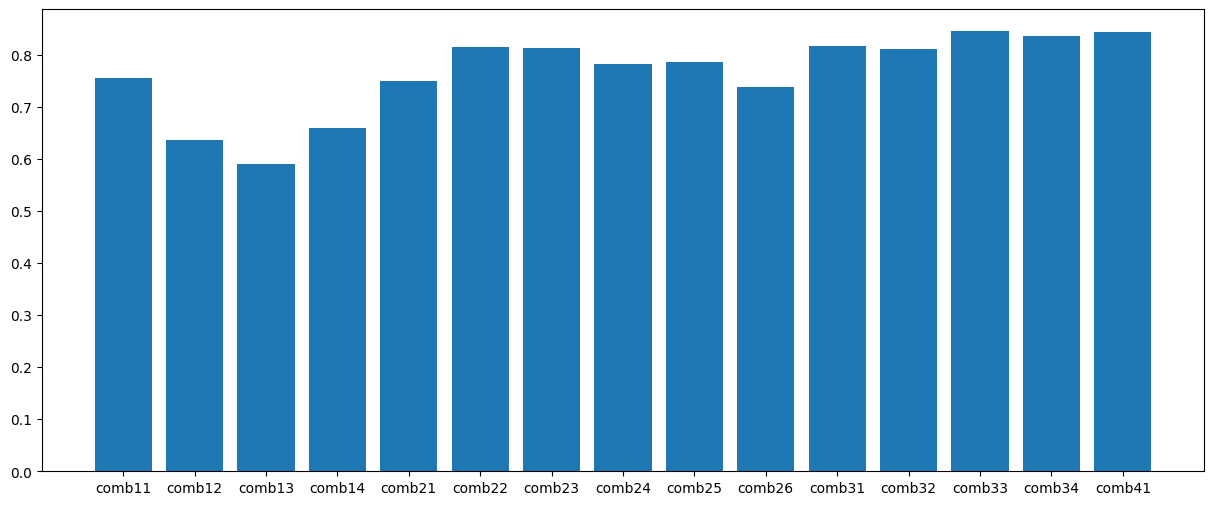

In [14]:
s_list = []
for df in ll:
    x = df
    y = data2['action']
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1,random_state=42)
    dtree = DecisionTreeClassifier(max_depth=18)
    dtree.fit(xtrain,ytrain)
    sco = dtree.score(xtest,ytest)
    s_list.append(sco)

print(s_list)
print(max(s_list))
ll_label = ['comb11', 'comb12', 'comb13', 'comb14', 'comb21', 'comb22', 'comb23', 'comb24', 'comb25', 'comb26', 'comb31', 'comb32', 'comb33', 'comb34', 'comb41']
plt.figure(figsize=(15, 6))
bars = plt.bar(ll_label, s_list)
plt.show()


각 데이터셋 별로 최적의 depth 수가 다를 수 있다. 따라서 max depth 를 크게 6 12 18 3가지로 나누어 실행시켜 보도록 한다. 18의 경우는 이미 수행했음으로 6과 12인 경우를 학습시켜보면 다음과 같다.

[0.5986750373353529, 0.5896720858960839, 0.5822687154515277, 0.604202792896728, 0.6030349572147473, 0.7010269876209417, 0.7207103272063247, 0.6983657378244283, 0.7202573485175565, 0.6303481565890705, 0.7003758307558374, 0.7229185983140699, 0.7196486584045241, 0.7182189444180993, 0.721177461479117]
0.7229185983140699


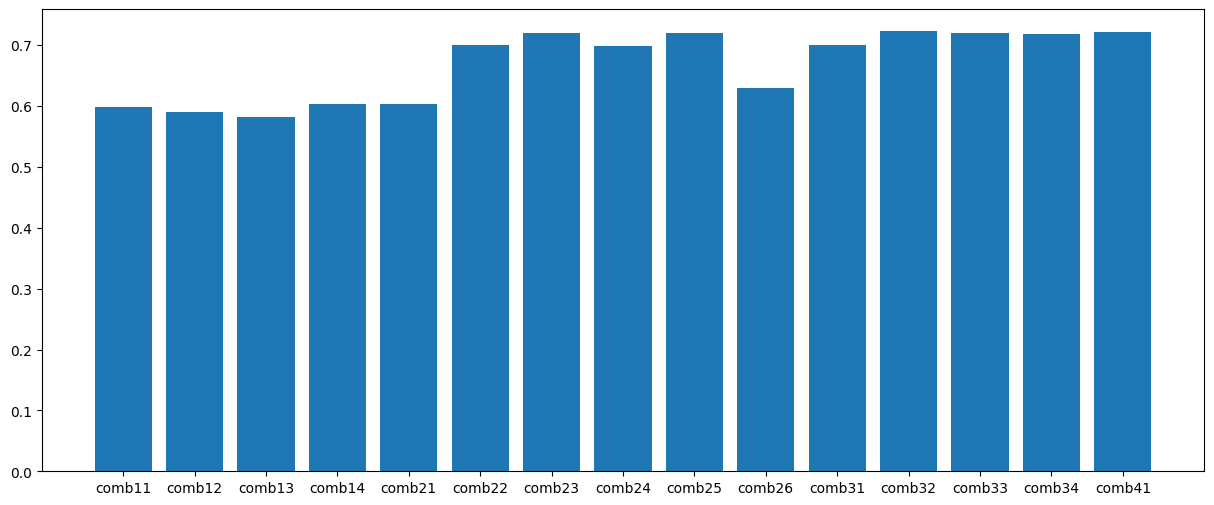

[0.7144323256916773, 0.6263704374783242, 0.6026386008620751, 0.6612710298895157, 0.697870292383588, 0.7676643994139588, 0.7725480759022415, 0.7513500888262897, 0.7636725247191886, 0.7078004345764295, 0.7672538874772626, 0.7709838838675886, 0.7917642812148322, 0.7888694642819226, 0.793165684033209]
0.793165684033209


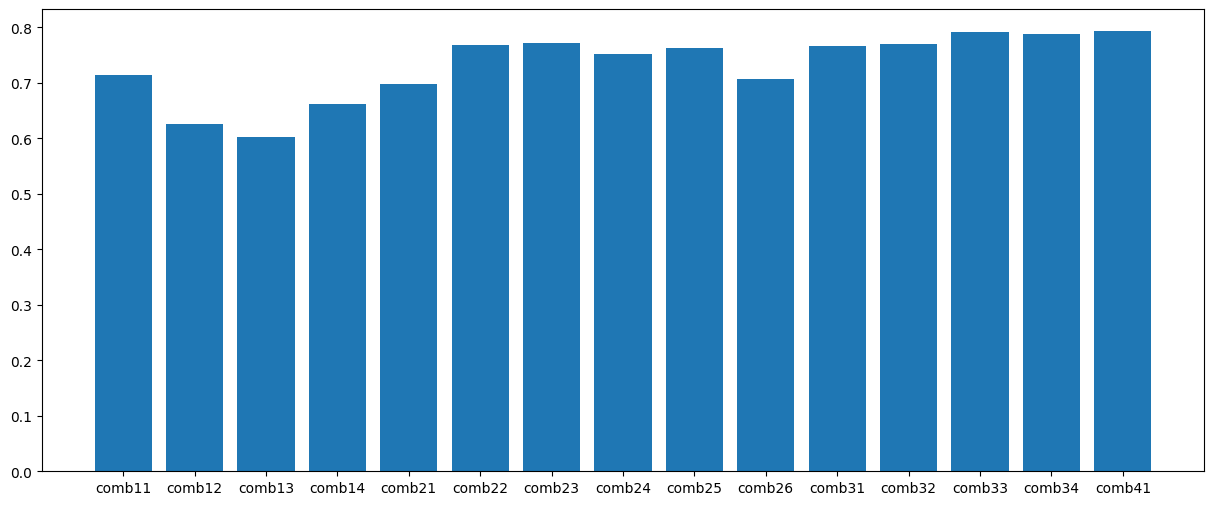

In [15]:
for i in [6,12]:
    s_list = []
    for df in ll:
        x = df
        y = data2['action']
        xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1,random_state=42)
        dtree = DecisionTreeClassifier(max_depth=i)
        dtree.fit(xtrain,ytrain)
        sco = dtree.score(xtest,ytest)
        s_list.append(sco)

    print(s_list)
    print(max(s_list))
    ll_label = ['comb11', 'comb12', 'comb13', 'comb14', 'comb21', 'comb22', 'comb23', 'comb24', 'comb25', 'comb26', 'comb31', 'comb32', 'comb33', 'comb34', 'comb41']
    plt.figure(figsize=(15, 6))
    bars = plt.bar(ll_label, s_list)
    plt.show()

decision tree 모델을 사용하여 보았을 때는 depth를 6, 12 ,18 세가지 경우를 모두 사용해 보았을 때 3가지 모두 비슷한 성능을 보였으며 모두 90%보다 낮은 성능을 보였다.
따라서 시계열 해석이 아닌 이런 기본적인 분류를 해 보았을 때 decision tree와 knn중에서는 knn이 더 나은 정확도를 보였으며 데이터셋은 4가지를 모두 활용한 것이 좋았으나 연산 cost가 높을 것이기 때문에  data clensing을 하는 데이터셋은 comb33으로 진행해 보도록 할 것이다. comb33 = pd.concat([atti,rot,user],axis=1)

## data 특성 분석 및 cleansing을 통한 knn 성능 향상

먼저 성능을 향상시킬 comb33 데이터셋을 통한 knn 학습 모델의 성능을 확인해 본다.

              precision    recall  f1-score   support

         dws       0.81      0.73      0.77     13026
         jog       0.92      0.86      0.89     13373
         sit       1.00      1.00      1.00     33651
         std       0.98      1.00      0.99     30649
         ups       0.85      0.81      0.83     16023
         wlk       0.89      0.95      0.92     34565

    accuracy                           0.93    141287
   macro avg       0.91      0.89      0.90    141287
weighted avg       0.93      0.93      0.93    141287

score :  0.9270845866923355
[[ 9553   450     1   194  1162  1666]
 [  652 11522     2    10   370   817]
 [    3     2 33637     0     7     2]
 [   25     2     0 30583    27    12]
 [  954   321     9   176 12937  1626]
 [  646   260     9   101   796 32753]]


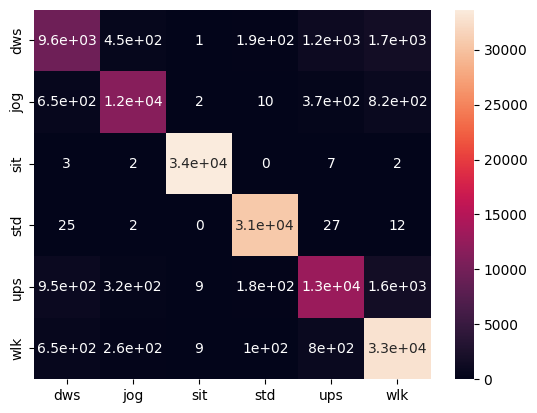

In [16]:
comb33X = comb33 #comb33은 action이 붙지 않음
comb33Y= data2['action']
comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)

knncomb33 = KNeighborsClassifier(n_neighbors=5)
knncomb33.fit(comb33Xtrain,comb33Ytrain)
comb33pred = knncomb33.predict(comb33Xtest)
comb33score = knncomb33.score(comb33Xtest,comb33Ytest)

print(classification_report(comb33Ytest,comb33pred))
print('score : ',comb33score)
cm = confusion_matrix(comb33Ytest,comb33pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)

In [17]:
comb33.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

 결측치를 보았을 때 결측치가 없음으로 평균값이나 양 옆 데이터의 최대, 최소값을 사용하여 그 값을 채워줄 필요가 없음

데이터의 분포를 확인해보기 위해서 데이터셋의 각 열을 히스토그램으로 plot해봄

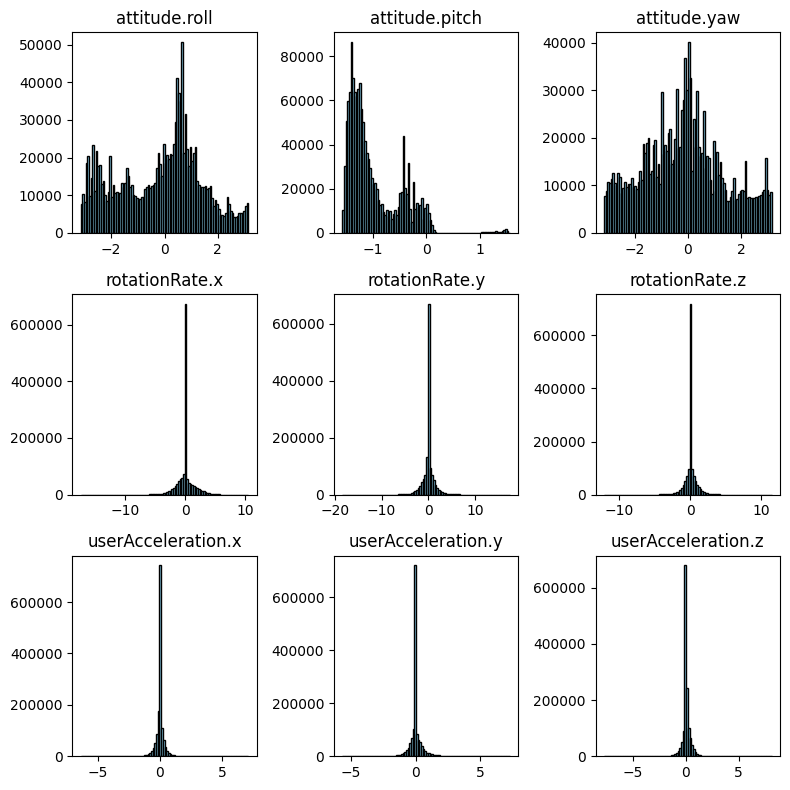

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# 각 서브플롯에 히스토그램 그리기
for i, column in enumerate(comb33.columns):
    ax = axs.flatten()[i]
    ax.hist(comb33[column], bins=100, color='skyblue', edgecolor='black')
    ax.set_title(column)

plt.tight_layout()
plt.show()

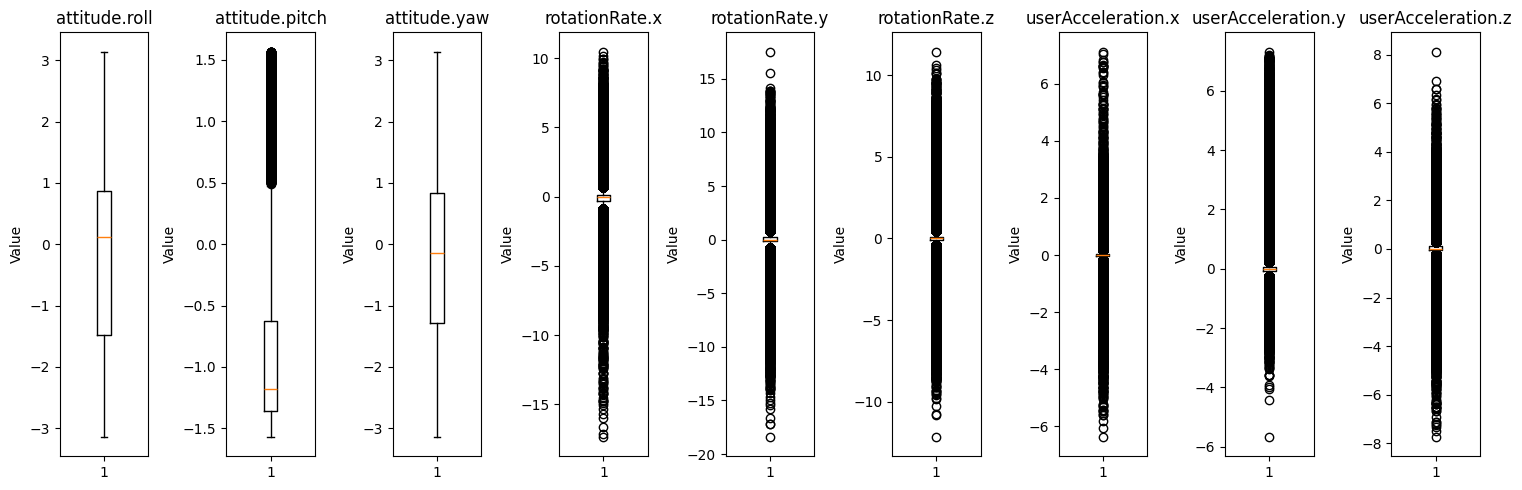

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=len(comb33.columns), figsize=(15, 5))  # 열 개수만큼 subplot 생성

# 각 열에 대한 박스플롯 그리기
for i, col in enumerate(comb33.columns):
    axes[i].boxplot(comb33[col])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()  # subplot 간 간격 조정
plt.show()

다른 데이터들은 정규분포처럼 나왔지만 attitude 데이터들은 분산이 매우 큰 것으로 보인다. 
따라서 attitude 데이터는 행동별로 많이 값의 양상이 다를 것으로 예상되며 이를 확인해보기 위해 행동별로 분류하여 histogram을 plot해 볼 것이다.

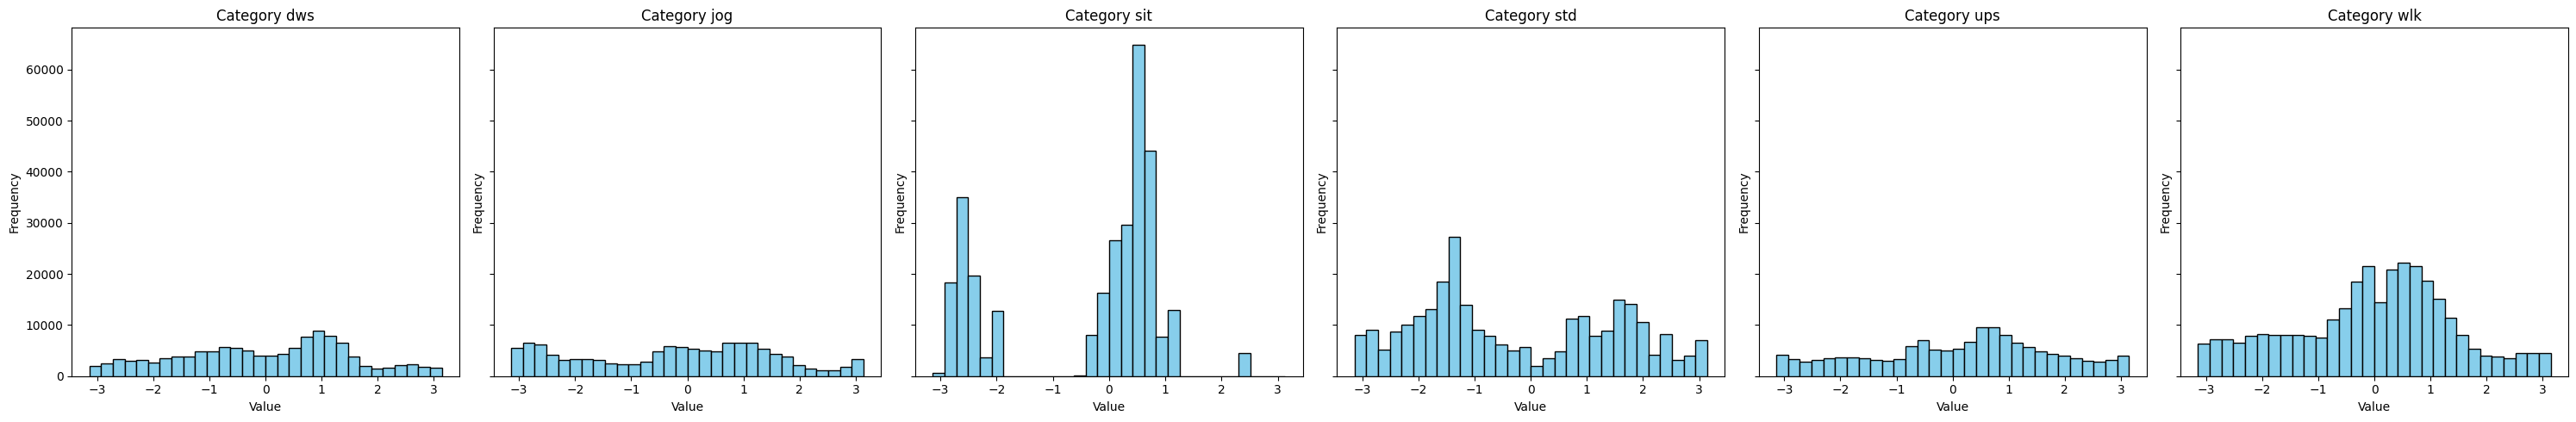

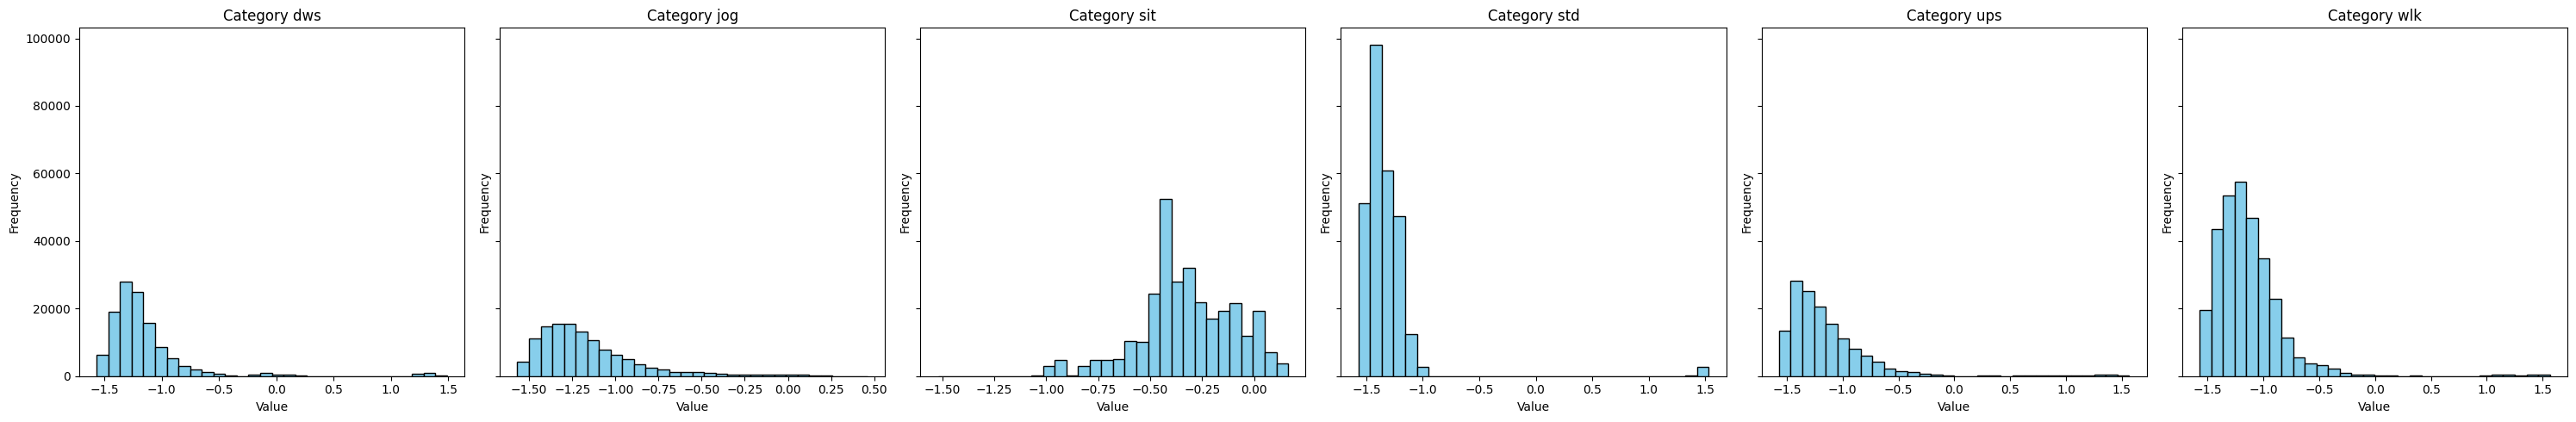

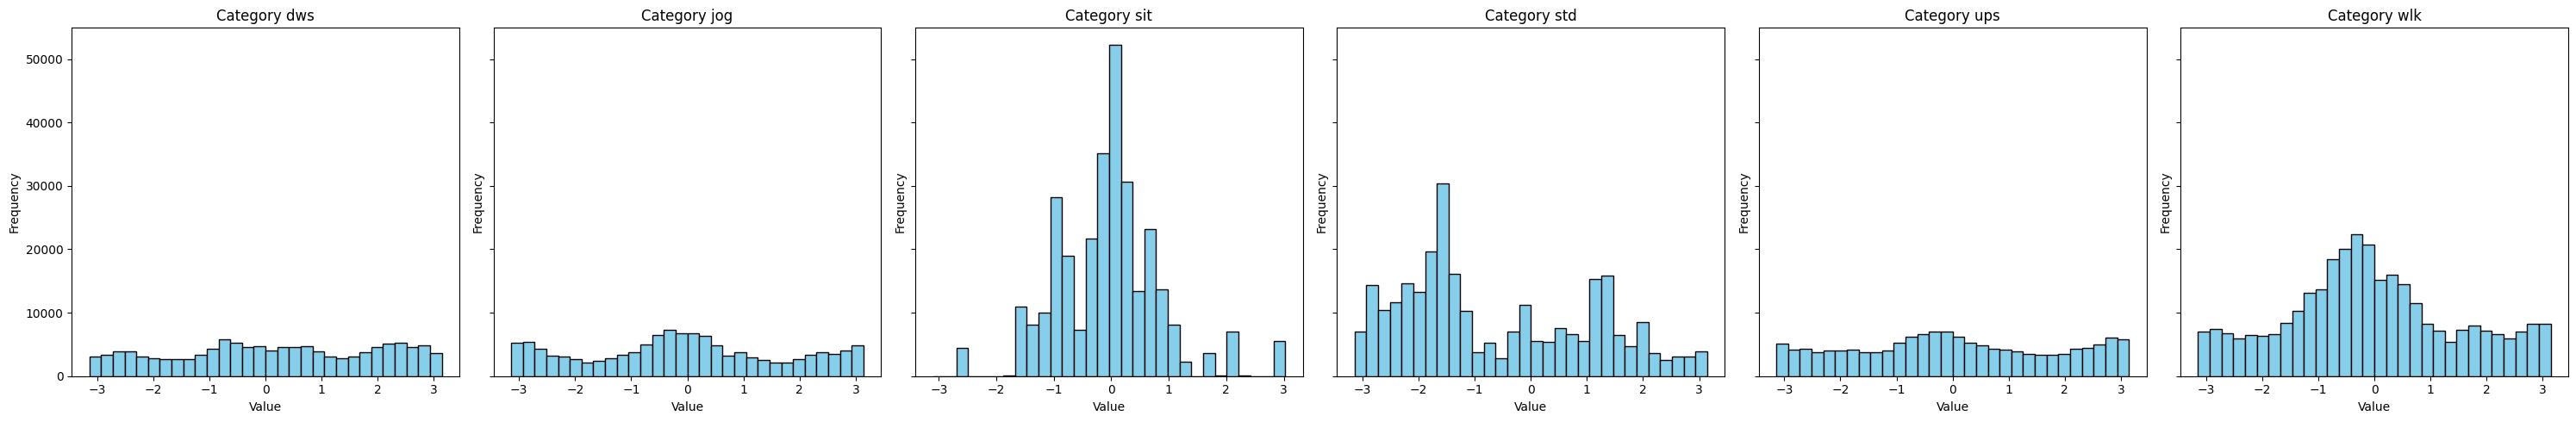

In [20]:
dataforcleansing = pd.concat([comb33,ytrain2],axis=1)
gdata = dataforcleansing.groupby('action')

num_groups = len(gdata)
fig, axs = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)

# 각 그룹에 대해 히스토그램 그리기
for (key, group), ax in zip(gdata, axs):
    ax.hist(group['attitude.roll'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Category {key}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)
for (key, group), ax in zip(gdata, axs):
    ax.hist(group['attitude.pitch'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Category {key}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)
for (key, group), ax in zip(gdata, axs):
    ax.hist(group['attitude.yaw'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Category {key}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()



여기서 확실하게 sit과 std의 데이터가 잘 분류되는 것을 볼 수 있다. sit과 std의 데이터는 확실히 다른 데이터들과 분포도의 차이가 있어 knn을 적용할 때 정확도가 높을 것으로 보인다.
sit과 std에 대한 분류는 hitmap으로 보았을 때 정확도가 상당히 높음으로 더이상 cleansing을 해주지 않아도 될 것으로 보인다.
wlk도 상대적으로 잘 분류되는 것으로 보이는데 dws로 분류되는 경우가 꽤 있다.
heatmap을 확인해 보았을 때 dws가 가장 분류가 힘든 것으로 보인다.

attitude데이터가 분산이 큰 것으로 보여 확인해 보았고 데이터의 특성이 잘 들어남을 확인했다.
정규분포 형태를 띄고 있는 다른 데이터들에서도 이러한 특성이 들어나는지 확인해 보면 다음과 같다.

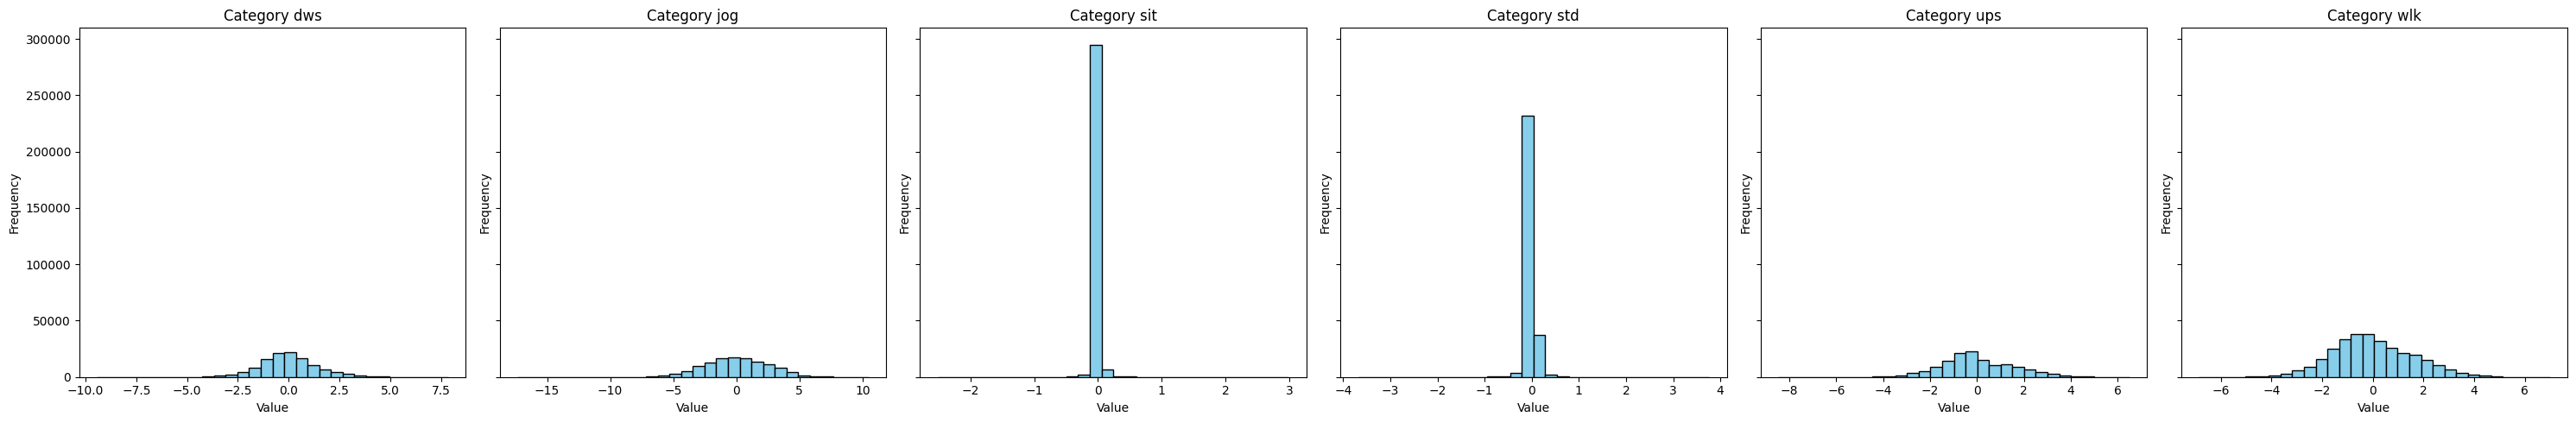

In [21]:
fig, axs = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)
for (key, group), ax in zip(gdata, axs):
    ax.hist(group['rotationRate.x'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Category {key}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

여기서도 마찬가지로 sit과 std를 구분하는 경우는 명확한 것을 볼 수 있다. 반면 다른 데이터에서는 특징을 잡기가 힘들다.

(0.0, 50000.0)

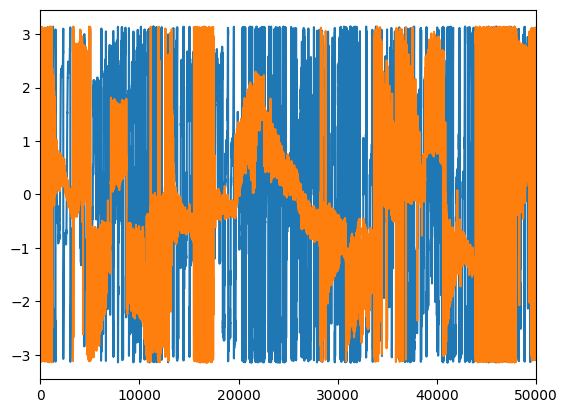

In [22]:
#gdata = dataforcleansing.groupby('action')
dws = gdata.get_group('dws')
wlk = gdata.get_group('wlk')
dws = dws.reset_index()
wlk = wlk.reset_index()
dws['attitude.yaw'].plot()
wlk['attitude.yaw'].plot()
plt.xlim([0,50000])


위의 plot에서 hist모양의 차이가 꽤 있는 dws와 wlk의 attitude.yaw를 plot해 보았을 때 일종의 주기가 다른 것을 볼 수 있다. 

(0.0, 300000.0)

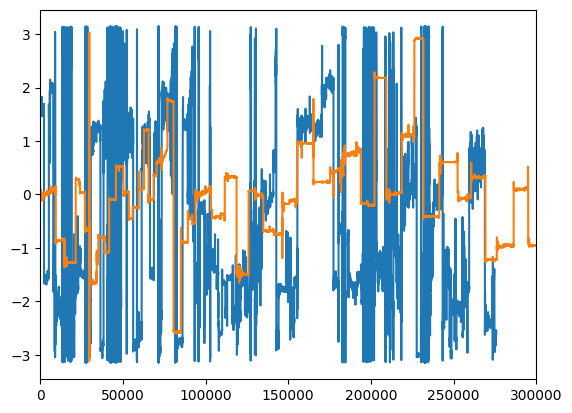

In [23]:
std = gdata.get_group('std')
sit = gdata.get_group('sit')
std = std.reset_index()
sit = sit.reset_index()
std['attitude.yaw'].plot()
sit['attitude.yaw'].plot()
plt.xlim([0,300000])

sit과 std도 주기가 매우 달라보인다. 따라서 주기를 활용해서 knn의 성능 향상도 이룰 수 있을 것이라고 판단할 수 있다.

# DATA CLEANSING

가장 먼저 튀는 데이터들을 제거해 주는 cleansing 작업을 거친다.

In [24]:
score_list = []
for j in [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001] :
    new33 = comb33.copy()
    for i in new33.columns:
        Q1 = new33[i].quantile(j)
        Q3 = new33[i].quantile(1-j)

        new33.loc[new33[i] < Q1, i] = Q1
        new33.loc[new33[i] > Q3, i] = Q3
    comb33X = new33 #comb33은 action이 붙지 않음
    comb33Y= data2['action']
    comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)
    knncomb33 = KNeighborsClassifier(n_neighbors=5)
    knncomb33.fit(comb33Xtrain,comb33Ytrain)
    comb33score = knncomb33.score(comb33Xtest,comb33Ytest)
    print(comb33score)
    score_list.append(comb33score)


0.8982213508673834
0.9177065122764303
0.9265042077473511
0.9271128978603834
0.9270916644843474
0.9270845866923355
0.9270775089003235
0.9270845866923355


새로 고친 데이터로 다시 학습 및 테스트 시켜보았을 때 어느 정도를 제거할 것인지에 따라 성능 향상이 달라졌다.
아무것도 고치지 않은 데이터의 정확도가 score :  0.9270845866923355 였고 위의 코드에 따라 상위 0.005, 하위 0.005의 데이터 값만 잘라냈을 때 정확도가 더 높게 측정되었다.
따라서 그정도의 범위를 벗어나는 데이터가 오차 데이터였음을 알 수 있고 약간의 성능 향상을 이루어 낼 수 있었다.

두번째 cleansing은 freq를 측정해서 추가해주어 knn에 도움을 주는 파라미터를 만들어 내는 것이다. 앞서 데이터에 어느정도 주기성이 있는 것을 확인할 수 있었으며
평균값을 기준으로 10000 index당 올라갔다 내려갔다 횟수를 freq로 하기. freq를 action기준으로 옆에 붙여서 같이 knn을 수행시켜 본다

In [25]:
fcomb = comb33.copy()
fcomb= pd.concat([fcomb,data2['action']],axis=1)

dws = fcomb[fcomb['action'] == 'dws']
jog = fcomb[fcomb['action'] == 'jog']
wlk = fcomb[fcomb['action'] == 'wlk']
sit = fcomb[fcomb['action'] == 'sit']
std = fcomb[fcomb['action'] == 'std']
ups = fcomb[fcomb['action'] == 'ups']

actlist = [dws, jog, wlk, sit, std, ups]
for act in actlist:
    l = int(len(act)/10000)
    #어디에다 평균 주파수를 적용해 주는게 좋을까?
    m = act['attitude.yaw'].mean()
    
    #freq측정
    num_cycles = 0
    in_cycle = False

    for value in act['attitude.yaw']:
        if value > m:
            if not in_cycle:
                num_cycles += 1
                in_cycle = True
        else:
            in_cycle = False
    
    # scaling

    freq = num_cycles/10000
    # print(freq)
    act['freq']  = freq

new_comb33 = pd.concat([dws,jog,sit,std,ups,wlk])
new_comb33 = new_comb33.reset_index()
new_comb33 = new_comb33.drop('index',axis=1)
new_comb33_ans = new_comb33['action']
new_comb33_train = new_comb33.drop('action',axis=1)

C:\Temp\ipykernel_4380\3984630931.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act['freq']  = freq
C:\Temp\ipykernel_4380\3984630931.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act['freq']  = freq
C:\Temp\ipykernel_4380\3984630931.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

              precision    recall  f1-score   support

         dws       0.84      0.78      0.81     13026
         jog       0.92      0.87      0.89     13373
         sit       1.00      1.00      1.00     33651
         std       0.99      1.00      0.99     30649
         ups       0.86      0.84      0.85     16023
         wlk       0.92      0.97      0.94     34565

    accuracy                           0.94    141287
   macro avg       0.92      0.91      0.92    141287
weighted avg       0.94      0.94      0.94    141287

score :  0.9415303601888355
[[10188   427     1   177  1301   932]
 [  575 11616     0     6   369   807]
 [    3     1 33640     0     6     1]
 [   27     1     1 30600    19     1]
 [  992   321     8   119 13494  1089]
 [  327   249     2     2   497 33488]]


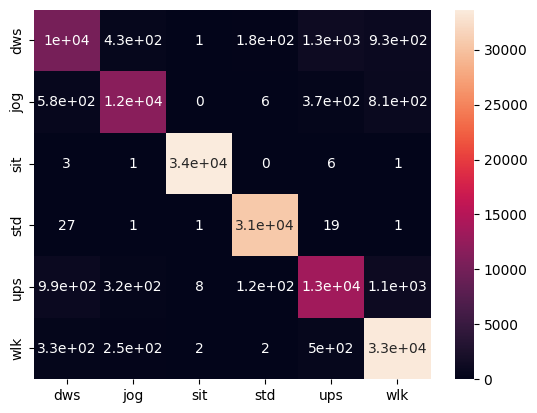

In [26]:
comb33X = new_comb33_train #comb33은 action이 붙지 않음
comb33Y = new_comb33_ans
comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)

knncomb33 = KNeighborsClassifier(n_neighbors=5)
knncomb33.fit(comb33Xtrain,comb33Ytrain)
comb33pred = knncomb33.predict(comb33Xtest)
comb33score = knncomb33.score(comb33Xtest,comb33Ytest)

print(classification_report(comb33Ytest,comb33pred))
print('score : ',comb33score)
cm = confusion_matrix(comb33Ytest,comb33pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)

히스토그램을 확인해 보았을 때 dws와 wlk가 잘 구별되지 않는 것을 볼 수 있었다. dws와 wlk이 크게 다른 파라미터는 attitude였고 attitude의 히스토그램 양상은 비슷한데 wlk가 값이 더 큰것을 볼 수 있었다. 따라서 wlk에 attitude yaw, roll에 가중치를 주면 다음과 같다.

C:\Temp\ipykernel_4380\2692058260.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['attitude.yaw'] = wlk['attitude.yaw']*2
C:\Temp\ipykernel_4380\2692058260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['attitude.roll'] = wlk['attitude.roll']*2
C:\Temp\ipykernel_4380\2692058260.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

              precision    recall  f1-score   support

         dws       0.83      0.81      0.82     13026
         jog       0.92      0.90      0.91     13373
         sit       1.00      1.00      1.00     33651
         std       0.99      1.00      0.99     30649
         ups       0.87      0.88      0.88     16023
         wlk       0.99      0.99      0.99     34565

    accuracy                           0.96    141287
   macro avg       0.93      0.93      0.93    141287
weighted avg       0.96      0.96      0.96    141287

score :  0.9575757146800484
[[10584   563     2   220  1548   109]
 [  798 11992     3    13   504    63]
 [    4     2 33638     0     7     0]
 [   28     3     0 30589    28     1]
 [ 1196   395     9   200 14160    63]
 [   93    38     0    18    86 34330]]


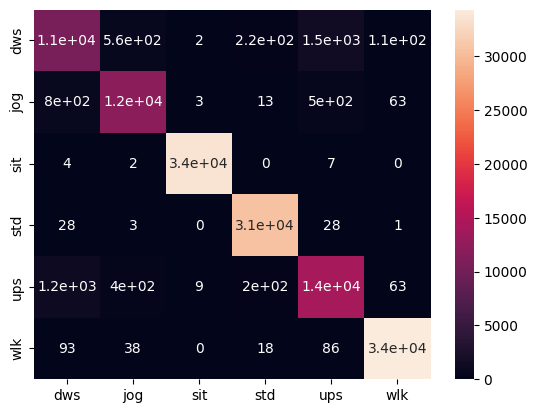

In [27]:
gcomb = comb33.copy()
gcomb= pd.concat([gcomb,data2['action']],axis=1)

dws = gcomb[gcomb['action'] == 'dws']
jog = gcomb[gcomb['action'] == 'jog']
wlk = gcomb[gcomb['action'] == 'wlk']
sit = gcomb[gcomb['action'] == 'sit']
std = gcomb[gcomb['action'] == 'std']
ups = gcomb[gcomb['action'] == 'ups']

#가중치를 준 부분
wlk['attitude.yaw'] = wlk['attitude.yaw']*2
wlk['attitude.roll'] = wlk['attitude.roll']*2
wlk['attitude.pitch'] = wlk['attitude.pitch']*2

new_comb33 = pd.concat([dws,jog,sit,std,ups,wlk])
new_comb33 = new_comb33.reset_index()
new_comb33 = new_comb33.drop('index',axis=1)
new_comb33_ans = new_comb33['action']
new_comb33_train = new_comb33.drop('action',axis=1)

comb33X = new_comb33_train #comb33은 action이 붙지 않음
comb33Y = new_comb33_ans
comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)

knncomb33 = KNeighborsClassifier(n_neighbors=5)
knncomb33.fit(comb33Xtrain,comb33Ytrain)
comb33pred = knncomb33.predict(comb33Xtest)
comb33score = knncomb33.score(comb33Xtest,comb33Ytest)

print(classification_report(comb33Ytest,comb33pred))
print('score : ',comb33score)
cm = confusion_matrix(comb33Ytest,comb33pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)

attitue에 대한 가중치를 주자 정확도가 높아진 것을 확인할 수 있다. 앞서 파라미터 한 종류씩만 가지고 knn을 돌려봤을 때 attitude에 대한 정확도가 가장 높았음을 활용하였으며 이를 heatmap을 통해서 분류가 잘 되지 않는 경우인 dws와 wlk의 경우를 비교하였다 wlk를 wlk로 검사하는 것보다 dws를 wlk로 분류해버리는 경우가 정확도 하락의 가장 큰 부분이였고 dws가 wlk로 분류되는 부분이 원래는 1700개 정도였는데 가중치를 준 후에는 112개로 감소하였다.

제 dws를 ups로 비교하는 경우가 가장 큰 오차를 만들어 내는 부분인데 이부분을 histogram을 살펴보면 ups와 dws가 매우 비슷한 양상을 띄고 있는 것을 확인하였다. pitch부분이 가중치를 주었을 때 값이 크게 상승할 것으로 예상됨으로 위와 같이 ups의 pitch에 가중치를 추가로 준다.

C:\Temp\ipykernel_4380\24137149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['attitude.yaw'] = wlk['attitude.yaw']*2
C:\Temp\ipykernel_4380\24137149.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlk['attitude.roll'] = wlk['attitude.roll']*2
C:\Temp\ipykernel_4380\24137149.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

              precision    recall  f1-score   support

         dws       0.90      0.90      0.90     13026
         jog       0.94      0.92      0.93     13373
         sit       1.00      1.00      1.00     33651
         std       0.99      1.00      0.99     30649
         ups       0.94      0.91      0.92     16023
         wlk       0.96      0.98      0.97     34565

    accuracy                           0.97    141287
   macro avg       0.95      0.95      0.95    141287
weighted avg       0.97      0.97      0.97    141287

score :  0.9663309433988972
[[11755   668     5   275   183   140]
 [  933 12241     5    27    89    78]
 [    6     4 33641     0     0     0]
 [   31     5     0 30612     0     1]
 [  277   131     3    25 14512  1075]
 [  104    39     0    16   637 33769]]


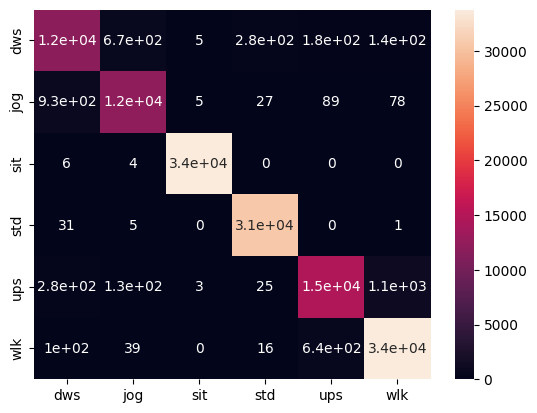

In [28]:
gcomb = comb33.copy()
gcomb= pd.concat([gcomb,data2['action']],axis=1)

dws = gcomb[gcomb['action'] == 'dws']
jog = gcomb[gcomb['action'] == 'jog']
wlk = gcomb[gcomb['action'] == 'wlk']
sit = gcomb[gcomb['action'] == 'sit']
std = gcomb[gcomb['action'] == 'std']
ups = gcomb[gcomb['action'] == 'ups']

wlk['attitude.yaw'] = wlk['attitude.yaw']*2
wlk['attitude.roll'] = wlk['attitude.roll']*2
wlk['attitude.pitch'] = wlk['attitude.pitch']*2
#가중치를 추가로 준 부분
ups['attitude.pitch'] = ups['attitude.pitch']*2

new_comb33 = pd.concat([dws,jog,sit,std,ups,wlk])
new_comb33 = new_comb33.reset_index()
new_comb33 = new_comb33.drop('index',axis=1)
new_comb33_ans = new_comb33['action']
new_comb33_train = new_comb33.drop('action',axis=1)

comb33X = new_comb33_train #comb33은 action이 붙지 않음
comb33Y = new_comb33_ans
comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)

knncomb33 = KNeighborsClassifier(n_neighbors=5)
knncomb33.fit(comb33Xtrain,comb33Ytrain)
comb33pred = knncomb33.predict(comb33Xtest)
comb33score = knncomb33.score(comb33Xtest,comb33Ytest)

print(classification_report(comb33Ytest,comb33pred))
print('score : ',comb33score)
cm = confusion_matrix(comb33Ytest,comb33pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)

정확도가 상승한 것을 볼 수 있다. freq를 사용한 것보다 정확도가 높아졌음을 알 수 있었고 타겟으로 했던 dws를 ups로 분류하는 경우가 1/10가량 줄어 정확도가 97%로 상승하였다.

주어진 데이터의 특성을 분석하고 이를 통회 최적의 데이터셋을 구성, cleansing과정을 통해 knn의 성능을 향상시킬 수 있었다. 
학습 성능이 정확도가 94.1%로 좋아진 것을 확인할 수 있다. 스마트폰 활동 데이터에 동작에 따른 주기성이 충분히 들어가 있었고 분석했던 파라미터 중 attitude.yaw에 해당하는 파라미터에 특히 주기성이 충분히 들어가 있어 학습시 추가한 주기성이 성능향상에 기여하였음을 볼 수 있다.

              precision    recall  f1-score   support

         dws       0.84      0.72      0.78     13026
         jog       0.93      0.87      0.89     13373
         sit       1.00      1.00      1.00     33651
         std       0.99      1.00      0.99     30649
         ups       0.85      0.82      0.83     16023
         wlk       0.88      0.96      0.92     34565

    accuracy                           0.93    141287
   macro avg       0.91      0.89      0.90    141287
weighted avg       0.93      0.93      0.93    141287

score :  0.929788303240921
[[ 9421   441     2   175  1196  1791]
 [  521 11585     1    10   390   866]
 [    1     1 33643     0     5     1]
 [   18     1     0 30592    27    11]
 [  778   261     9   143 13113  1719]
 [  512   227     6    81   726 33013]]


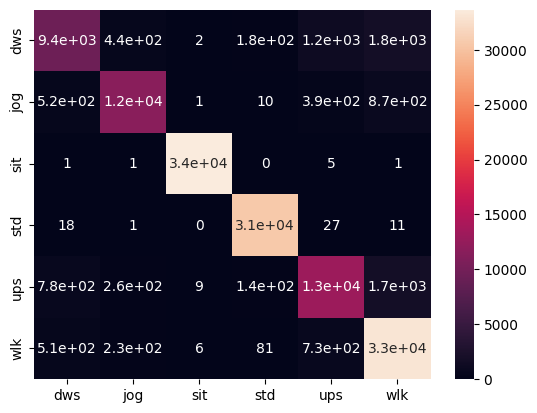

In [29]:
comb33X = comb33 #comb33은 action이 붙지 않음
comb33Y= data2['action']
comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)

knncomb33 = KNeighborsClassifier(n_neighbors=5,weights='distance')
knncomb33.fit(comb33Xtrain,comb33Ytrain)
comb33pred = knncomb33.predict(comb33Xtest)
comb33score = knncomb33.score(comb33Xtest,comb33Ytest)

print(classification_report(comb33Ytest,comb33pred))
print('score : ',comb33score)
cm = confusion_matrix(comb33Ytest,comb33pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)

knn메소드 자체에서 거리에 따른 가중치를 준경우 정확도가 약간 92.7->92.9로 약간의 상승은 하였으나 큰 성능 향상은 보이지 못했다. 

              precision    recall  f1-score   support

         dws       0.84      0.74      0.79     13026
         jog       0.93      0.88      0.90     13373
         sit       1.00      1.00      1.00     33651
         std       0.99      1.00      0.99     30649
         ups       0.85      0.83      0.84     16023
         wlk       0.89      0.95      0.92     34565

    accuracy                           0.93    141287
   macro avg       0.92      0.90      0.91    141287
weighted avg       0.93      0.93      0.93    141287

score :  0.9327822092619986
[[ 9604   418     2   174  1134  1694]
 [  505 11709     1    10   388   760]
 [    1     1 33643     0     5     1]
 [   18     2     0 30593    25    11]
 [  753   245     7   147 13256  1615]
 [  536   228     6    84   726 32985]]


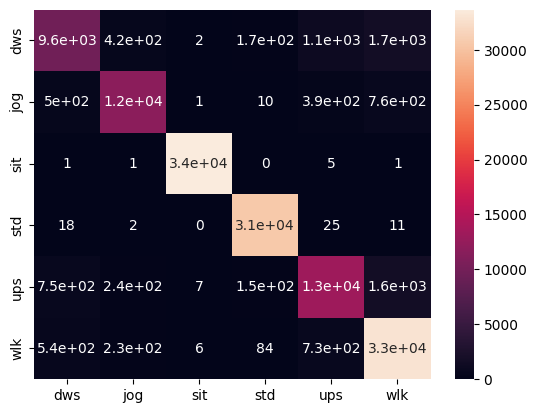

In [30]:
def gaussian_weights(distances):
    sigma = 0.3
    weights = np.exp(-(distances ** 2) / (2 * sigma ** 2))
    return weights

comb33X = comb33 #comb33은 action이 붙지 않음
comb33Y= data2['action']
comb33Xtrain, comb33Xtest, comb33Ytrain, comb33Ytest = train_test_split(comb33X,comb33Y,test_size=0.1,random_state=42)

knncomb33 = KNeighborsClassifier(n_neighbors=5,weights=gaussian_weights)
knncomb33.fit(comb33Xtrain,comb33Ytrain)
comb33pred = knncomb33.predict(comb33Xtest)
comb33score = knncomb33.score(comb33Xtest,comb33Ytest)

print(classification_report(comb33Ytest,comb33pred))
print('score : ',comb33score)
cm = confusion_matrix(comb33Ytest,comb33pred)
label = ['dws','jog','sit','std', 'ups', 'wlk']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)
print(cm)